# Readme

logon_info.csv (~850k records)
* Fields: id, date, user, pc, activity (Logon/Logoff)
* Logoff requires preceding logon
* Each user has an assigned machine, but can share others
* 100 machines shared (physically shared) by some of the users in addition to their assigned PC. 
* Some logons occur after-hours 
*Note: Screen unlocks are recorded as logons. Screen locks are not recorded.
* 12 of the users are IT administrators

device_info.csv (~66k records)
* Fields: id, date, user, pc, activity (connect/disconnect)
* Some users use a portable zip drive
* Some connect(s) may be missing disconnect(s), since machine may be turned off without a proper disconnect. 


Employees_info Folder
* 18 Employee files (~1k records each file)
  - Fields: employee_name, user_id, email, domain, role
  - Record of who is employed at the end of the month 

HTTP_info.csv (~3.5M records)
* Fields: id, date, user, pc, url
* Up to 15 URLs visited daily between daily logon and daily logoff
* Up to 5 URLs visited daily after-hours


Additional Note:
Field ids are unique within a .csv file but are not necessarily unique across all files.


# Notes

Please read the README file before starting any analysis


Goals:
Make sure data is readable 
			- Check that pc id is the same file to file
			- Rename indices/column names with easier identifiers
			- Take characters and turn them into unique identifiers
				- i.e. user id = 1, logon times = 2, etc.


Find various summaries 
	- Focus on summaries not models
	- Maybe start looking at traffic densities
		- i.e. Logon times, computer usage, etc.
		- We can discuss what to look at together	


Comprehend the summaries
	- Look for patterns, anomalies, or anything interesting from the data
	- Question the summaries
	- This will help us figure out what the research objective will be


Start thinking about models
	- This is when we can start looking at models 
	- Apply questions from summaries to an analysis


=======================================================================

9/20/17
====
Some topics that we can research
device_info
1. What time do they usually connect?
2. Which user connect more frequently?
3. Which PC is used more frequently?
4. Are there some users who is prefer to use specific PC?
5. Are there some users who often turns off the PC without disconnection?
6. How long is the connection duration?


logon_info
Any questions about connection can be changed to logon problem.

http_info
1. Which website do they often browse?
2. Are there some user who has the same interests?
3. Are there some rush hours that some websites are often been visited?

Employees_info
1. Which role has the most employees?
2. Which role has the longest employment period?
3. What is the distribution of employment period?
(existing problem)

What can we get from column “Domain” and “Email”? 


1. Any employees who still access the system even after they were no longer employees?
2. Are there any PCs accessed by more than one person?
3. Which URLs are visited most frequently by the employees?
4. Any employees who don't have any http info at all?
5. What kind of employees visit use their system after-hours? Classification based on employee roles....




If some sites were visited frequently in specific time, were they correlated to any event?
Are there some specific systems that are accessed by high privilege employees like VPs?
Difference in usage by employee role..
What derived variables can be created?





http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-identify-the-distribution-of-your-data-using-minitab

This can be used to find distribution of data


Viz?? Link??











In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  datetime import datetime
%matplotlib inline

In [3]:
data_dir = "C:\\Users\\talha\\Documents\\DA\\DataSets1_9182017\\DataSets1_9182017\\"

In [4]:
logon_df = pd.read_csv(data_dir+"logon_info.csv", index_col=0)
logon_df.shape

(849579, 4)

In [5]:
dev_df = pd.read_csv(data_dir+"device_info.csv", index_col=0)
dev_df.shape

(65668, 4)

In [6]:
http_df = pd.read_csv(data_dir+"http_info.csv", index_col=0, header=None, names=['date', 'user', 'pc', 'url'])
http_df.shape

(3451665, 4)

In [7]:
http_df.head()

,date,user,pc,url
{M8H9-W9NL75TH-1322KOLO},01/04/2010 07:08:47,ACME/AMA0606,PC-1514,http://cnet.com
{V0E1-R0FE91SC-2381GTDZ},01/04/2010 07:35:19,ACME/DBM0698,PC-1444,http://force.open.com
{V7C8-H6KA39YG-3352HMOW},01/04/2010 07:40:40,ACME/HBF0035,PC-0991,http://tendencystem.org
{O9P7-D9DL54YQ-9903OMYE},01/04/2010 07:52:25,ACME/SVC0175,PC-3384,http://bent.cup.org
{L3J0-E4RF05KN-7341OQVW},01/04/2010 07:55:50,ACME/CMU0028,PC-4253,http://taxpotato.east.org


In [8]:
logon_df.head()

,date,user,pc,activity
id,,,,
{Y6O4-A7KC67IN-0899AOZK},01/04/2010 00:10:37,ACME/KEE0997,PC-1914,Logon
{O5Y6-O7CJ02JC-6704RWBS},01/04/2010 00:52:16,ACME/KEE0997,PC-1914,Logoff
{D2D1-C6EB14QJ-2100RSZO},01/04/2010 01:17:20,ACME/KEE0997,PC-3363,Logon
{H9W1-X0MC70BT-6065RPAT},01/04/2010 01:28:34,ACME/KEE0997,PC-3363,Logoff
{H3H4-S5AZ00AZ-9560IYHC},01/04/2010 01:57:30,ACME/BJM0992,PC-3058,Logon


In [9]:
dev_df.head()

,date,user,pc,activity
id,,,,
{S7A7-Y8QZ65MW-8738SAZP},01/04/2010 07:12:31,ACME/RES0962,PC-3736,Connect
{G7A8-G1OB94NR-3006NTXH},01/04/2010 07:35:40,ACME/BJC0569,PC-2588,Connect
{R3L8-N0LW95FR-8358LLXS},01/04/2010 08:00:38,ACME/EMZ0196,PC-1479,Connect
{I2F1-B5FB51FL-3128HBUL},01/04/2010 08:02:14,ACME/ZKH0388,PC-1021,Connect
{P7R6-C5TV18CT-1677DWWM},01/04/2010 08:20:17,ACME/RES0962,PC-3736,Disconnect


In [10]:
logon_df['date'] = pd.to_datetime(logon_df['date'])

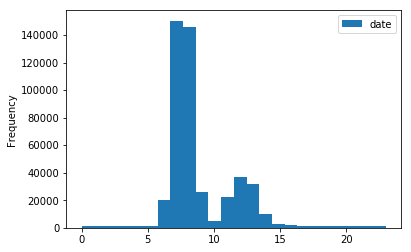

In [54]:
time_logon = logon_df[['date', 'activity']]
time_logon = time_logon[time_logon['activity'] == 'Logon']
time_logon['date'] = time_logon['date'].apply(lambda x : x.hour)
time_logon.plot.hist(bins=24)

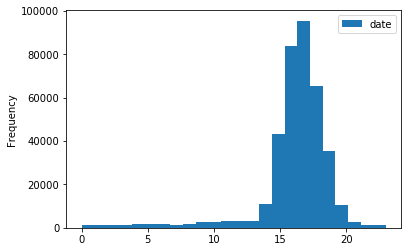

In [55]:
time_logon = logon_df[['date', 'activity']]
time_logon = time_logon[time_logon['activity'] == 'Logoff']
time_logon['date'] = time_logon['date'].apply(lambda x : x.hour)
time_logon.plot.hist(bins=24)

In [94]:
pd.Timestamp('05/14/2011 05:49:30').minute

49

In [36]:
only_logons = logon_df[logon_df['activity'] == 'Logon']
total_logons = only_logons.shape[0]
total_logoffs = logon_df.shape[0] - only_logons.shape[0]
print(total_logons)
print(total_logoffs)

470877
378702
